In [3]:
# Dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from scipy.stats import sem

In [4]:
# Import the Boston housing data set from sklearn and get description
boston_dataset = load_boston()

In [5]:
# Read Boston housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)
housing_data['MEDV'] = boston_dataset.target

In [75]:
# Create a bunch of samples, each with sample size of 20
sample_set = [housing_data.sample(20) for x in range(0,25)]

In [76]:
# Calculate standard error of means
means = [sample.MEDV.mean() for sample in sample_set]
standard_errors = [sem(sample.MEDV) for sample in sample_set]
x_axis = np.arange(0, len(sample_set),1) + 1

In [77]:
# Determine which sample's mean is closest to the population mean
sem_range = max(standard_errors) - min(standard_errors)
closest_mean = means[standard_errors.index(min(standard_errors))]

In [78]:
# Compare to the population mean
pop_mean = housing_data["MEDV"].mean()

print(f"The population mean is {pop_mean}. The closest sample mean is {closest_mean}.")

The population mean is 22.532806324110698. The closest sample mean is 21.904999999999998.


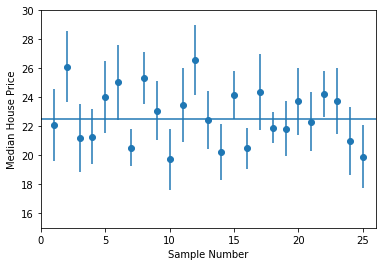

In [79]:
# Plot sample means with error bars
plt.errorbar(x_axis, means, standard_errors, fmt="o")
plt.xlim(0, len(sample_set) + 1)
plt.ylim(15,30)
plt.xlabel("Sample Number")
plt.ylabel("Median House Price")
plt.hlines(pop_mean, 0, 26)
plt.show()